## **Project : CREDICT CARD FRAUD DETECTION**

### Problem **Fraudelent Trasactions cost Bank millions of Dollars yearly**.

##### **Business Understanding (problem)** : 

💼 **Business Understanding Summary**: Credit Card Fraud Detection

**A credit default refers to a situation where a borrower (like an individual or company) fails to meet their debt obligations, such as repaying a loan or paying off a credit card balance. This failure can have serious consequences, including damage to the borrower's credit score, legal action by the lender, and potential asset seizure**:


* 💸 **Financial Losses**: Billions lost annually from chargebacks and reimbursements.

* 🛡️ **Customer Trust Issues**: If users feel unsafe, they may stop using the card or switch banks.

* 🔍 **Operational Costs**: Investigating fraud cases and tightening security costs time and money.

* ⚖️**Regulatory Pressure**: Banks must comply with laws around fraud protection and customer reimbursement.

**Business Goal**

Minimize financial losses and protect customers by detecting fraudulent transactions in real-time, without rejecting too many valid transactions (false positives).


## **Data Understanding**

## 📊 **Data Understanding** : Credit Card Fraud Detection Dataset

📦 **Dataset Source**

📍 **Origin**: The dataset is made available on [Kaggle](https://www.kaggle.com/datasets/rashmitachauhan/creditcardfrauddetection/data) from a research collaboration with European cardholders.


Since the dataset relates to **credit risk (with a column like 'default payment next month')**, this is **more of a credit default prediction dataset**, **not transaction-based fraud detection like the PCA one**. But it's still related to financial risk modeling.

📁 Dataset Details

Filename: creditCardFraud_28011964_120214.csv


🔢 Features (Columns)

`'LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2'`
 `'PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3',``PAY_AMT4'PAY_AMT5','PAY_AMT6','default payment next month'`

**Note** : Original dataset got it from `kaggle.com` but loaded the dataset in **Database** to practice sql skill

**Tools used** :

* SQL - queries dataset from database
* Python - data preparation, data cleaning etc
* Tableau - to communicate my inisights


In cell below import libraries to use




In [4]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In cell below I create a database connection using `connector()` to database called **bank_db** and `SHOWS DATABASE` existing in mysql. I use **Mysql** Database

In [5]:
from mysql import connector
from dotenv import load_dotenv
import os

load_dotenv()
# PASSWORD = os.getenv("PASSWORD")

try:
    with connector.connect(
        host="localhost",
        user="root",
        password="",
    ) as database:
        # Create database if it doesn't exist
        create_db = "CREATE DATABASE IF NOT EXISTS `Bank_db`"
        with database.cursor() as cursor:
            cursor.execute(create_db)
            print("✅ Database created or already exists.")

        # Show all existing databases
        show_existing_db = "SHOW DATABASES"
        with database.cursor() as cursor:
            cursor.execute(show_existing_db)
            print("📦 Existing databases:")
            for db in cursor:
                print(f" - {db[0]}")

except connector.Error as err:
    print(f"❌ Error: {err}")


✅ Database created or already exists.
📦 Existing databases:
 - bank_db
 - information_schema
 - my_wordpress
 - mysql
 - performance_schema
 - phpmyadmin
 - portfolio
 - test


The output above shows all database connected to the server.

In cell below I load dataset and upload it `bank_db` database for working with. **sqlalchemy** is used for uploading dataset in database the data is stored in a table called `credit_card_fraud`.

In [6]:
# load dataset

card_df = pd.read_csv("data/creditCardFraud_28011964_120214.csv")

# Upload DataFrame to MySQL table

from sqlalchemy import create_engine 

# create sqlalchemy engine to MysQL

db_url = f"mysql+mysqlconnector://root:@localhost/Bank_db"  
engine = create_engine(db_url) # creates a bridge between python and database

# Upload DataFrame to MySQL table
card_df.to_sql(name="credit_card_fraud", con=engine, if_exists="replace", index=False)

print("✅ DataFrame uploaded to MySQL table 'credit_card_fraud' successfully.")



✅ DataFrame uploaded to MySQL table 'credit_card_fraud' successfully.


Below I write a `sql statement` to query my entire data from **bank_db** for preparation, cleaning, analysis, model selection & training

In [7]:

# query 

query = """
SELECT *
 FROM credit_card_fraud;
"""

# Read the data from the MySQL table into a DataFrame
fraud_df = pd.read_sql(query, engine)
fraud_df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


Cell above I query data from `bank_db` and returns 5 first rows for concise and efficient.

Below I start data preparetion, cleaning etc.

In [8]:
# check for metadata summary

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

The output above shows the metadata summary of entire dataset. The dataset contains 1001 entries and 24 columns and contains no null values. And entire dataset contains int64 dtypes.

In cell below I check for **statistical summary** using `.describe()`

In [9]:
# statistics summary

fraud_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,167532.467532,1.589411,1.776224,1.604396,34.945055,-0.004995,-0.161838,-0.164835,-0.283716,-0.283716,...,40748.408591,39078.666334,38012.011988,5382.339660,5051.400599,4176.149850,4671.488511,5331.049950,5090.704296,0.213786
std,130587.921320,0.492187,0.750916,0.532298,9.219760,1.173446,1.228732,1.262459,1.184662,1.170224,...,68206.929510,63108.238729,63074.415024,12180.755275,15626.153184,10514.647502,13269.943983,16812.536877,23658.888052,0.410183
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3684.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1423.000000,1206.000000,830.000000,1000.000000,390.000000,228.000000,148.000000,189.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17710.000000,17580.000000,15846.000000,2184.000000,1710.000000,1206.000000,1398.000000,1306.000000,1250.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48851.000000,46404.000000,46557.000000,5090.000000,4500.000000,3720.000000,4000.000000,3745.000000,3784.000000,0.000000
max,700000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,628699.000000,484612.000000,473944.000000,199646.000000,285138.000000,133657.000000,188840.000000,195599.000000,528666.000000,1.000000


In [10]:
# check the shape of the dataset
fraud_df.shape

(1001, 24)

The cell above shows shape of fraud_df which contains 1001 entries and 24 columns.

## **Data Cleaning**

Considering there are **No missing data**, I will check the **data format**, **duplicates** and **outliers**. And all data is in int64 dtypes so no need of groupig data.

In cell below I check for duplicates

In [11]:
# check for duplicates

fraud_df.duplicated().sum()

np.int64(0)

Fraud_df contains no duplicates

In cell below I check for outliers using `boxplot` 

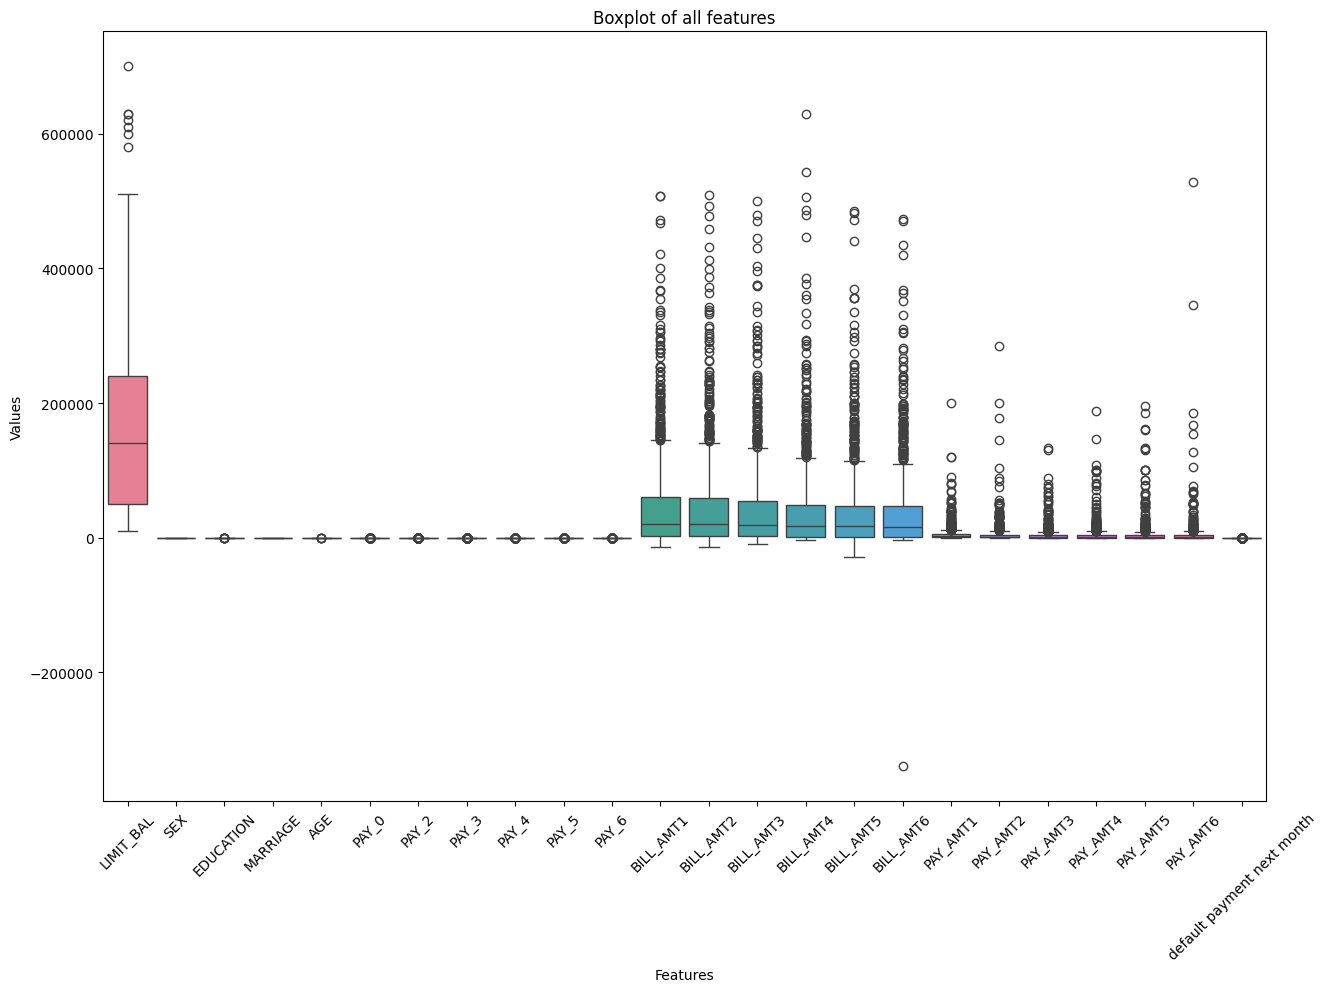

In [12]:
# check for outliers

fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=fraud_df, ax=ax)
ax.set_title("Boxplot of all features")
ax.set_xlabel("Features")
ax.set_ylabel("Values") 
ax.tick_params(axis='x', rotation=45)
plt.show()

The above cell shows significant number of outliers, especially in features like:

* `LIMIT_BAL`
* All `BILL_AMT features (BILL_AMT1 to BILL_AMT6)`
* All `PAY_AMT features (PAY_AMT1 to PAY_AMT6)`

Below I create a function to remove the outliers known as `remove_outliers()`



In [13]:
# Remove outliers

def remove_outliers(df, columns):
    """Remove outliers from multiple columns using the IQR method."""
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


cols_to_clean = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6'] 

# make a copy to avoid modifiny the original dataset 
outlier_copy = fraud_df.copy()
outlier_copy = remove_outliers(outlier_copy, cols_to_clean)

After removing outliers plot a boxplot to check if the outliers have been removed successfully In cell below

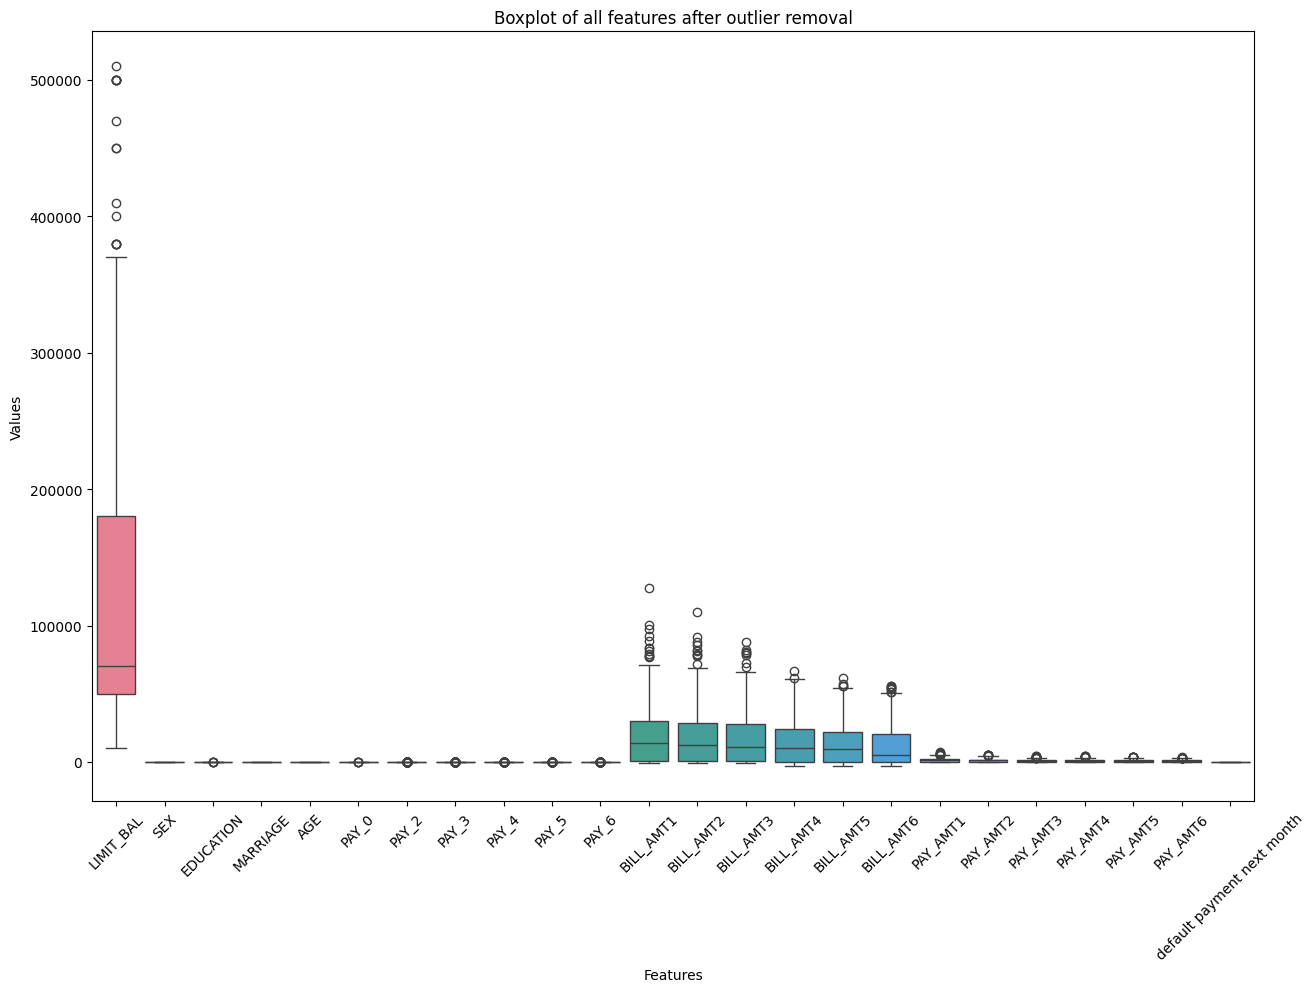

In [14]:
# check if outliers are removed
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=outlier_copy, ax=ax)
ax.set_title("Boxplot of all features after outlier removal")
ax.set_xlabel("Features")
ax.set_ylabel("Values")
ax.tick_params(axis='x', rotation=45)
plt.show()

The cell above shows the features after removing outliers looks much cleaner and values are tight.

## **EXPORATORY DATA ANALYSIS(EDA)**

The following are some questions I derived to guide me through the Analysis

🧠**Problem Recap**

**Problem**: Defaults (non-payment of debt) cost banks heavily, similar to fraud.

**Goal**: Use data to predict if someone is likely to default (target: 'default payment next month') and identify patterns or anomalies in behavior.

**Type**: Binary classification — 0 = No Default, 1 = Default.

1. 🎯 **Analysis Questions**:

🧑‍🤝‍🧑 **Demographic-Based Analysis**

1. **Gender & Default**:

* Is default more common among male or female cardholders?
* What’s the default rate per gender?
* Education Level & Default:
* Which education groups have the highest/lowest default rate?

2. **Marital Status & Default**:

* Are single individuals more likely to default than married ones?
* Age Groups & Default:
* Are younger cardholders defaulting more often than older ones?


2. 💰 **Financial Behavior-Based**

**Credit Limit Impact**:

* Is there a pattern between credit limit (LIMIT_BAL) and default?
* Do people with low or high limits default more?

**Bill Amount Trends**:

* Do higher outstanding bills (BILL_AMT1 to BILL_AMT6) correlate with defaults?
* Are there increasing/decreasing bill trends for defaulters?

**Payment History & Default**:

* Do past due payments (PAY_0 to PAY_6) strongly predict default?
* How many months of delayed payment do defaulters have?

**Repayment Amounts & Default**:

* Do consistent repayments (PAY_AMT1 to PAY_AMT6) reduce default risk?
* What's the average payment amount among defaulters?







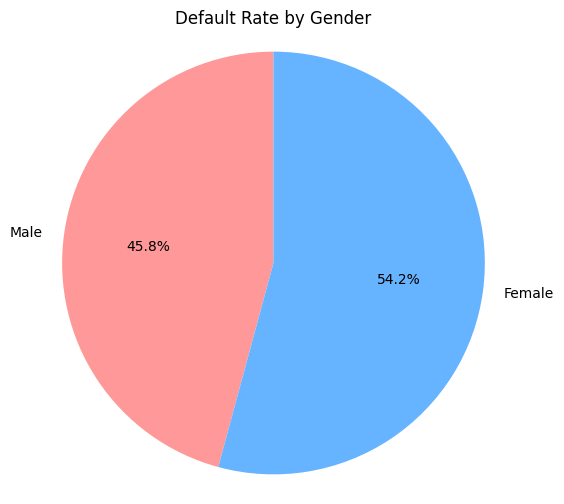

In [15]:
# Gender default rate (pie chart)

# filter only defaulted  from non-defaulted (defaulted = 1, non-defaulted = 0)

# create a sample before filtering to above lose of records after filtering

credit_fraud = fraud_df.copy()

defaulted = credit_fraud[credit_fraud['default payment next month'] == 1]
non_defaulted = credit_fraud[credit_fraud['default payment next month'] == 0]

# count defaulted by gender
gender_default_counts = defaulted['SEX'].value_counts().sort_index()

# Label mapping
labels = ['Male', 'Female']
colors = ['#ff9999','#66b3ff']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_default_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Default Rate by Gender')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()








📊 **Observation**

* Based on the dataset, 53.1% of the credit card defaults were by female cardholders, compared to 46.9% by males.
* While the difference is not extremely large, it does indicate that females were slightly more likely to default on their credit card payments at the end of the month in this data.

✅ **Recommendation**

* Targeted financial literacy programs: Consider providing personalized financial management resources to groups more likely to default, which could include female cardholders based on this data.

In cell below I group `SEX`, `EDucation` and `defaulted` to get deeper insight why female gender were more likely to default than Male

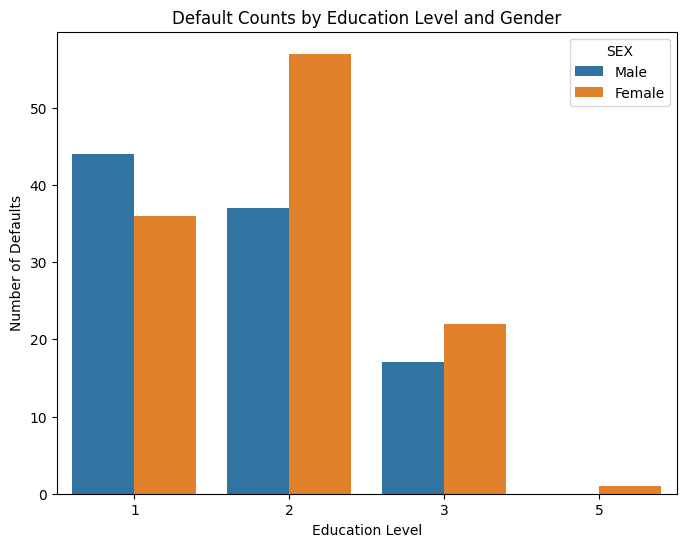

In [16]:
# groupby
edu_sex_defaults = defaulted.groupby(['EDUCATION', 'SEX']).size().unstack(fill_value=0)

# melted 
edu_sex_defaults_melted = edu_sex_defaults.reset_index().melt(id_vars='EDUCATION', var_name='SEX', value_name='Defaults')
edu_sex_defaults_melted['SEX'] = edu_sex_defaults_melted['SEX'].map({1: "Male", 2: "Female"})



# plot 

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=edu_sex_defaults_melted, x='EDUCATION', y='Defaults', hue='SEX')
ax.set_title("Default Counts by Education Level and Gender")
ax.set_xlabel("Education Level")
ax.set_ylabel("Number of Defaults")
plt.show()


📊 **Observations**:

**Education Level 2**:

* Has the highest number of defaults overall.
* Females default more than males in this category.
* This might indicate that young working professionals (possibly recent grads) are struggling with repayment.

**Education Level 1**:

* A significant number of defaults are observed.
* Males default more than females here.
* Despite higher education, some still struggle to manage debt effectively.

**Education Level 3**:

* Defaults are relatively low compared to Levels 1 and 2.
* Fairly even default rates between male and female.
* Education Level 5 (Unknown or ill-defined category):
* Very few defaults, and only from females.

**Both Education level 4 & 6 had only one count that why not indicated in plot**

✅ **Recommendations**:

**Targeted Financial Education**:

* Focus efforts on clients with Education Level 2, especially females, as they have the highest default counts.
* Include debt management, budgeting, and credit score education during or immediately after university.

**Refine Credit Risk Models**:

* Incorporate education level and gender as features in your credit risk prediction model.
* These factors clearly correlate with default risk in this subset.

**Offer Different Credit Products**:

* Design more tailored financial products for university-level clients, potentially with gradual repayment plans or grace periods.
* Policy Adjustment Based on Gender-Education Patterns:
* Use insights to adjust credit approval thresholds or interest rates, especially where default likelihood is statistically higher.

#### **Marital Status & Default**:

Below I find insights between **marriage** and **single** credict cardholders who were more likely to default.

**(0 level, 1 level, 2 level, 3 level)**

* Are single individuals more likely to default than married ones?
* Age Groups & Default:
* Are younger cardholders defaulting more often than older ones

C:\Users\ronny somi\AppData\Local\Temp\ipykernel_16044\1489579262.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fraud_df, x='MARRIAGE',y='AGE', hue='default payment next month', palette='husl', ci=None)


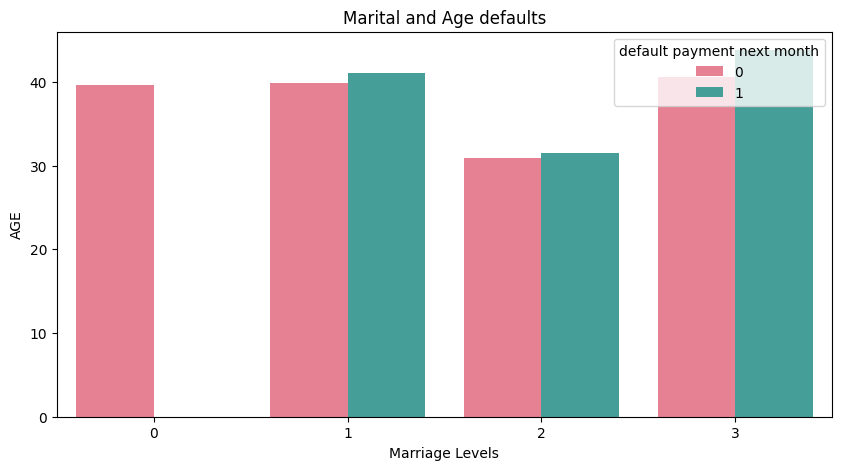

In [17]:
# groupby

marital_status =fraud_df.groupby(['MARRIAGE', 'AGE'])['default payment next month'].size().unstack()





# melt
marital_status_melted = marital_status.reset_index().melt(id_vars='MARRIAGE', var_name='default payment next month', value_name='AGE')

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=fraud_df, x='MARRIAGE',y='AGE', hue='default payment next month', palette='husl', ci=None)
ax.set_title("Marital and Age defaults")
ax.set_xlabel('Marriage Levels')
ax.set_ylabel('AGE')

plt.show()

📊 **Observations**:

**Marital Level 0 (Unknown or Not Provided)**:

* Only non-defaulters are represented with the highest average age (~51).
* Shows non-defaulters only because dataset contained only one value count

**Marital Level 1 (Married)**:

* Married individuals have a relatively high average age (~40+).
* Both defaulters and non-defaulters are closely matched in age, with a slight increase for defaulters.

**Marital Level 2 (Single)**:

* Single individuals show the lowest average age (~30–32).
* Slightly more defaulting occurs among the younger singles compared to non-defaulting, indicating age might play a factor.

**Marital Level 3 (Others)**:

* Individuals in this category are generally older than singles but slightly younger than the married group.
* There is very little difference between the age of defaulters and non-defaulters.

**Consistency in Defaults**:

* Across all marital levels, age doesn't drastically change between defaulters and non-defaulters, except for Level 0.
* However, younger individuals (mainly single) tend to have more defaults, supporting the link between age and repayment capability.


✅ **Recommedation**

F**ocus on Young, Single Clients**:

* Since defaults are more common among younger and single individuals, provide financial literacy training, custom repayment plans, or smaller credit limits for this group.

**Married Clients Show Stability**:

* Married individuals tend to default less relative to their age — suggesting greater financial stability. Consider offering them incentives or better rates.

**Married Clients Show Stability**:

* Married individuals tend to default less relative to their age — suggesting greater financial stability. Consider offering them incentives or better rates.



## **In cell below I find Insight based on financial behaviour**

**Do people with `higher` or `lower` credit limit tend to default more or less**

* Is there a pattern between credit limit (LIMIT_BAL) and default?
* Do people with low or high limits default more?



C:\Users\ronny somi\AppData\Local\Temp\ipykernel_16044\2172911342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fraud_df, x='default payment next month', y='LIMIT_BAL',palette='Set2')


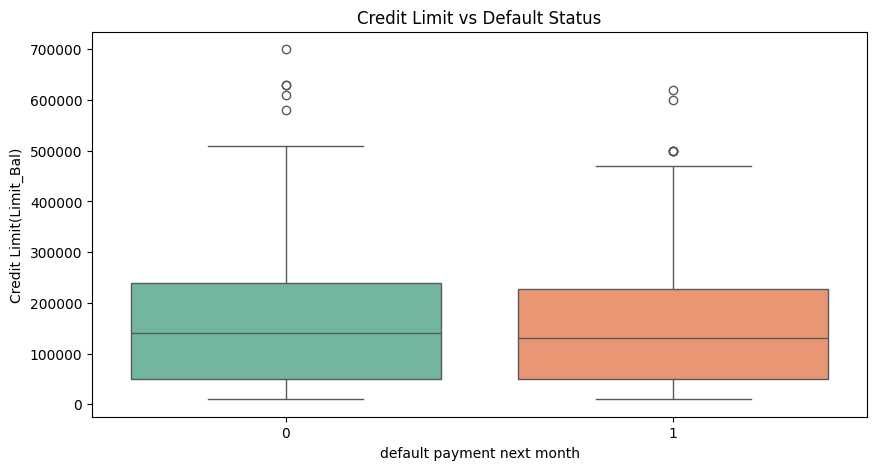

In [18]:
fig, ax =plt.subplots(figsize=(10,5))
sns.boxplot(data=fraud_df, x='default payment next month', y='LIMIT_BAL',palette='Set2')
ax.set_title("Credit Limit vs Default Status")
ax.set_xlabel('default payment next month')
ax.set_ylabel('Credit Limit(Limit_Bal)')
plt.show()

✅ **Observation**:

* The median credit limit for those who did not default (0) is higher than for those who did default (1).
* This suggests people with lower credit limits are more likely to default.

* The interquartile range (middle 50%) for both groups is similar, but non-defaulters have a wider range overall — possibly indicating a broader financial profile.

* Outliers (dots) exist in both groups, but defaulters have fewer extremely high credit limits, suggesting that very high credit limit holders tend to manage credit better.

✅ **Recommendation**:

* **Credit Risk Management**: Credit issuers could consider monitoring low-limit clients more closely, as they may carry a higher risk of default.
* **Graduated Credit Limits**: Rather than assigning low limits indefinitely, build a system to gradually increase limits for clients with responsible payment history — this may improve trust and reduce default rates.
* **Early Intervention**: Clients with lower limits and early signs of repayment issues may benefit from financial literacy or restructuring programs.

**Insights**

Individuals with **lower credit limits tend to default more frequently**, while those with **higher credit limits are less likely to default**.




In cell Below I find the distribution of credit limits for **defaulters** and **non-defaulters**. Using **kdeplot to view the density of non-defaulters & defaulters**

C:\Users\ronny somi\AppData\Local\Temp\ipykernel_16044\3236625601.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fraud_df[fraud_df['default payment next month'] == 1], x='LIMIT_BAL', label='Defaulted', shade=True)
C:\Users\ronny somi\AppData\Local\Temp\ipykernel_16044\3236625601.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fraud_df[fraud_df['default payment next month'] == 0], x='LIMIT_BAL', label='Not Defaulted', shade=True)


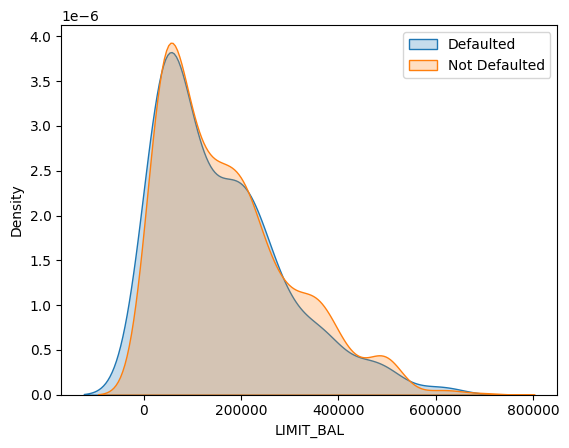

In [19]:
# kde plot to determine the density of non-defaulters & defaulters

sns.kdeplot(data=fraud_df[fraud_df['default payment next month'] == 1], x='LIMIT_BAL', label='Defaulted', shade=True)
sns.kdeplot(data=fraud_df[fraud_df['default payment next month'] == 0], x='LIMIT_BAL', label='Not Defaulted', shade=True)
ax.set_title("Distribution of Credit Limit by Default Status")
plt.legend()
plt.show()


✅ **Observation**

* Most people who default tend to have lower credit limits.
* People with higher credit limits are less likely to default.
* Even though some people with low credit limits don’t default, the risk of default is clearly higher among those with smaller limits.
* Those with very high credit limits rarely default.


✅ **Recommendation**

**Credit Limit Strategy**:

* Consider using credit limit as a risk-scoring component — lower credit limits may signal higher risk, especially for new or young accounts.

**Preventive Measures**:

* Clients with low limits and increasing usage might benefit from educational nudges or alerts about responsible credit usage.
* Introduce graduated credit increases tied to positive repayment behavior to help transition clients from higher-risk categories.

**Policy Adjustment**:

* Review lending policies — avoid over-constraining credit limits for clients with stable financial behavior, as higher limits might reflect financial trustworthiness.

**key Insights**

* While both defaulters and non-defaulters tend to have lower credit limits, individuals with higher credit limits are more likely to be non-defaulters, suggesting a negative correlation between credit limit and default risk



**Bill Amount Trends**:

* Do higher outstanding bills (BILL_AMT1 to BILL_AMT6) correlate with defaults?
* Are there increasing/decreasing bill trends for defaulters?

In cell below I perform I correlation to determine **Do higher outstanding bills (BILL_AMT1 to BILL_AMT6) correlate with defaults** using **heatmap**.
First I store **(BILL_AMT1 to BILL_AMT6)** in a list then perform correlation.


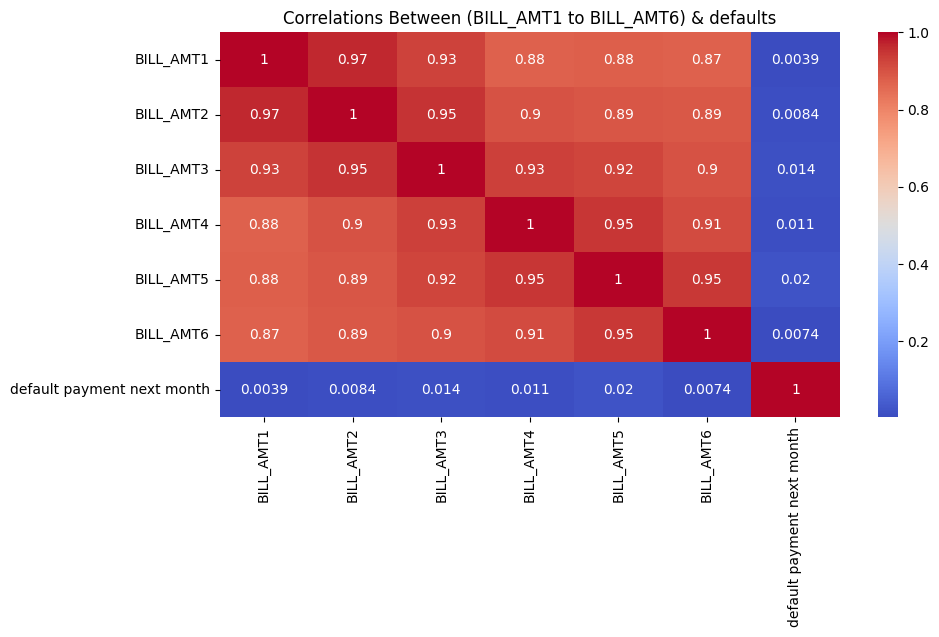

In [20]:
# select the BILL_AMT1 and store them in a List
data_corr = fraud_df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'default payment next month']]
corr_matrix = data_corr.corr()

# plot 
fig,ax =plt.subplots(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
ax.set_title('Correlations Between (BILL_AMT1 to BILL_AMT6) & defaults')
plt.show()

✅ **Observation**

* There is very little connection between the amount of money people owe (bill amounts) and whether they default.
* Even when the bills are high or low, it doesn’t strongly affect whether a person misses payment the next month.
* The correlation values are close to zero, which means outstanding bill amounts don't clearly explain who defaults and who doesn’t.
* However, the bill amounts over the 6 months are very similar to each other, meaning people’s monthly spending habits are often consistent.

✅ Recommendation
Don’t rely only on bill amounts to predict if someone will default — they are not strong indicators.

Instead, combine bill data with other financial behaviors like payment history, credit limit usage, and repayment trends to get a better understanding of the risk.

Consider monitoring how people pay off their bills rather than just how much they owe.

A more effective risk model should use multiple indicators — not just bill amounts — to decide who might default.

In cell ploted a **lineplot** to find tread in **Are bill increasing or decreasing for defaulters**. To achieve the results I stored `BILL_AMT1`, `BILL_AMT2`, `BILL_AMT3`, ..., `BILL_AMT6` to a variable called **bill_data** then `groupby` data **default payment next month** to find the mean. Then **melts** the data. Lastly I plot lineplot to find insight from it.



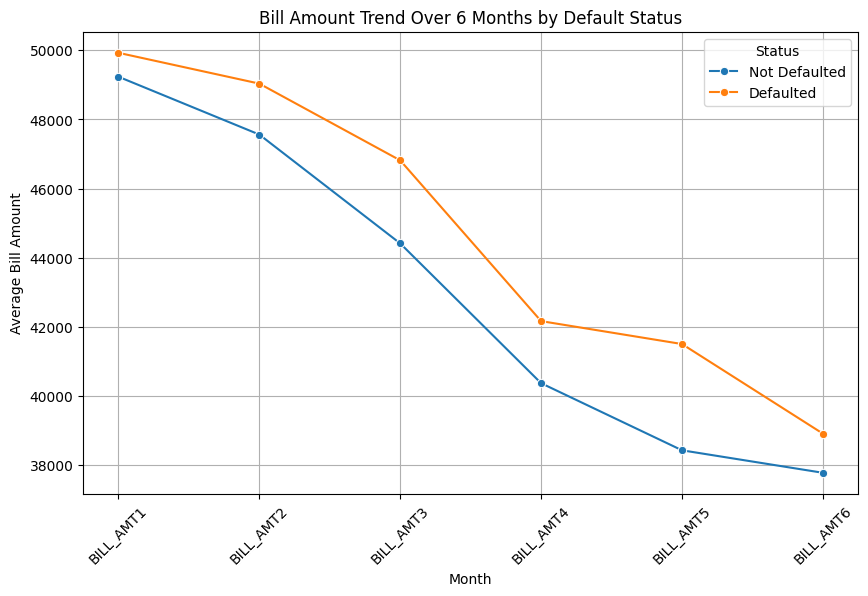

In [21]:


#  Select only the necessary columns
bill_data = fraud_df[['default payment next month', 
                      'BILL_AMT1','BILL_AMT2','BILL_AMT3',
                      'BILL_AMT4','BILL_AMT5','BILL_AMT6']]

#  Group by default status and calculate the average
bill_avg = bill_data.groupby('default payment next month').mean().reset_index()

# Melt the data for plotting
bill_avg_melted = bill_avg.melt(id_vars='default payment next month',
                                var_name='Month',
                                value_name='Average Bill Amount')

# Replace numeric label with text
bill_avg_melted['Status'] = bill_avg_melted['default payment next month'].map({0: 'Not Defaulted', 1: 'Defaulted'})

# Plot
fig, ax =plt.subplots(figsize=(10, 6))
sns.lineplot(data=bill_avg_melted, x='Month', y='Average Bill Amount', hue='Status', marker='o')
ax.set_title('Bill Amount Trend Over 6 Months by Default Status')
ax.set_ylabel('Average Bill Amount')
ax.set_xlabel('Month')
ax.tick_params(axis='x', rotation=45)
plt.grid(True)
plt.show()


✅ **Observation** :

 The line plot illustrates the trend of average bill amounts over six months, comparing **defaulters** and **non-defaulters**:

* **Non-defaulters** consistently maintain higher average bill amounts compared to defaulters across all six months.
* Both groups exhibit a **gradual decline** in average bill amounts over time, suggesting bill repayment or reduced credit usage.
* The gap between defaulters and non-defaulters remains **fairly constant**, implying a sustained difference in credit usage behavior or financial capability.

✅ **Recommendation**:

* **Credit risk management teams** should focus on customers whose bill amounts are **lower but not reducing** significantly, as this might indicate difficulty in repayment.
* Consider implementing early intervention strategies for customers showing erratic or low repayment trends in early months.
* Use the trend as part of a credit scoring model, giving weight to consistent decrease in bill amounts as a positive indicator.





In cell below I **analyzes the payment behavior of credit card customers over six months (PAY_0 to PAY_6)** by:

* **Melting the payment status** columns into a long format to make them easier to compare across months.
* Creating a boxplot to visualize the distribution of payment delays for each month, categorized by whether the customer defaulted or not (default payment next month).

**In this context**:

* **Delay = -1 means early payment**.
* **Delay = 0 means on-time payment**.
* **Delay > 0 indicates the number of months the payment was late**.

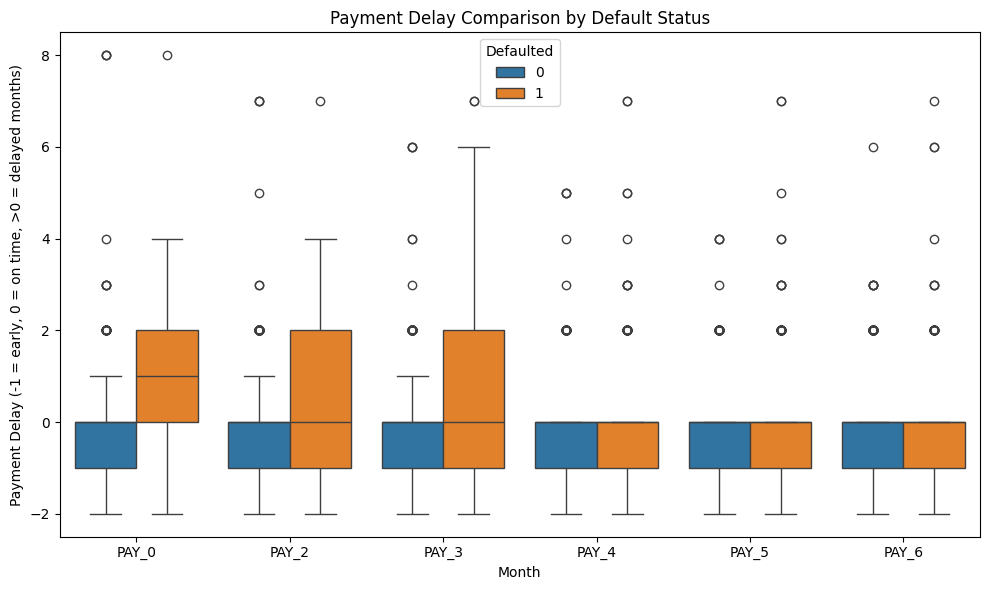

In [22]:
# Melt the PAY columns to long format for easier comparison
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_melted = fraud_df.melt(id_vars='default payment next month', value_vars=pay_columns,
                           var_name='PAY_Month', value_name='Delay')

plt.figure(figsize=(10, 6))
sns.boxplot(data=pay_melted, x='PAY_Month', y='Delay', hue='default payment next month')
plt.title('Payment Delay Comparison by Default Status')
plt.xlabel('Month')
plt.ylabel('Payment Delay (-1 = early, 0 = on time, >0 = delayed months)')
plt.legend(title='Defaulted')
plt.tight_layout()
plt.show()

✅ **Observation**:

* **Defaulters** generally have **higher payment delays** across all months compared to non-defaulters, as shown by higher medians and more outliers on the positive side.
* **Non-defaulters** tend to have payment delays clustered around -1 to 1, indicating timely or early payments.
The variance in payment delays is **much greater for defaulters**, especially in earlier months (e.g., PAY_0 and PAY_2), indicating more inconsistent behavior.


✅ **Recommendation**:

* Use payment delay patterns as a **predictive feature** in default risk models  high and inconsistent delays are strong indicators of default risk.
* Consider **monitoring customers with increasing or sustained delays** across multiple months for early intervention.
* Promote **payment reminders and flexible repayment plans** for customers showing early signs of delay to reduce default rates.
* Financial institutions can build **targeted credit management strategies to reduce risk** exposure by identifying customers with worsening payment behavior.



## **Conclusion**

**Credit Limit Matters**
* Customers with lower credit limits showed a significantly higher likelihood of defaulting compared to those with higher limits, suggesting that creditworthiness and default risk are closely linked.

**Payment History Is a Strong Indicator**
* Past due payments (especially consistent delays across months) were highly associated with defaults, making historical payment behavior a critical factor in risk assessment.

**Outstanding Bills and Default Risk**
* Defaulters tend to carry higher outstanding balances over time, indicating potential over-leverage or poor financial planning.

**Financial Behavior Is Predictable**
* Through trends in billing and repayment data, it is possible to anticipate which customers may be at risk, allowing for early intervention strategies.

**Demographic Features Alone Are Not Enough**
* Variables like age, gender, and marital status showed limited predictive power compared to financial variables like payment history and bill amounts.

* Non-defaulters consistently maintain higher average bill amounts than defaulters across all six months.
* Both groups show a gradual decrease in bill amounts over time, suggesting ongoing repayment or reduced usage.
* The consistent gap in billing behavior indicates a potential relationship between credit utilization and default risk.
* Stable or declining bill amounts among non-defaulters may reflect more responsible financial management.
* Defaulters show significantly higher and more variable payment delays across all months compared to non-defaulters.
* Non-defaulters mostly pay on time or early, with delays concentrated between -1 and 1.
* The wider distribution and higher median delays among defaulters highlight inconsistent and risky payment patterns.
* Payment delay trends serve as a strong indicator for identifying customers at risk of default.

## 🧮 **Computation Statistics**

### ✅ Why Perform Computational Statistics?

Computational statistics are foundational in data analysis as they help us better understand the structure and behavior of the data before drawing conclusions or building models. Below are the key reasons for using them:

1. **Understand Data Distribution**  
   Computational statistics help uncover how data is distributed — whether it’s skewed, normal, or has outliers.

2. **Measure Spread and Central Tendency**  
   Using the **mean** and **standard deviation**, we can evaluate how concentrated or dispersed the values are around the average.

3. **Apply the Central Limit Theorem (CLT)**  
   CLT allows us to create a sampling distribution from the population. Even if the data is not normally distributed, the distribution of the sample means tends to be normal for sufficiently large sample sizes. This makes statistical inference possible.

4. **Construct Confidence Intervals (CI)**  
   Confidence intervals give us a range in which the population parameter (e.g., mean) is likely to fall. This helps us estimate and reason about data with a quantifiable level of certainty.

5. **Use the t-distribution for Small or Unknown Populations**  
   When the population standard deviation is unknown (common in real-world scenarios), we use the **t-distribution** to make inferences about sample statistics.

---

### 🎯 **Purpose in This Project**

The primary objective of this project is to **identify credit card fraud** or understand **why most users default on their payments**.

Thus, the features selected for computational statistics are **not picked at random**. Instead, they are chosen based on:

- The **business problem** being addressed  
- The **relevance of the variable** to user behavior and financial risk  
- The potential to reveal **insights** about defaulting patterns  

---

### 🔍 Example: `LIMIT_BAL`

In this analysis, the feature **`LIMIT_BAL`** (Credit Limit) was selected to investigate the hypothesis:

> "Are users with lower credit limits more likely to default on their payments?"

By performing statistical analysis on `LIMIT_BAL` for both defaulters and non-defaulters:

- We can construct **confidence intervals** to understand the expected credit limit range for each group.  
- We can apply a **t-test** to determine whether the difference in means is statistically significant.  
- This helps us determine if credit limit is a strong **predictor** of default behavior.  

---

### 📌 Final Note

Performing computational statistics ensures that the insights we derive are **grounded in statistical rigor**, and that any assumptions we make for hypothesis testing or modeling are **justified by the data**.

It sets the stage for deeper **exploratory data analysis** and **predictive modeling**, supporting the project’s goal of uncovering fraud or risky credit behavior.


**In cell below** I create a sample from the population data to work with in Computational stats and store it under variable **fraud_sample_copy**. Then create a sample of `n=30` which takes 30 attributes from original data. 

In [24]:
# Draw a sample from the dataset(n = 30)

# Random sample of size 30

# create a copy of dataset fro original
fraud_sample_copy = fraud_df.copy()

fraud_sample_copy =fraud_df.sample(n=30, random_state =1)

fraud_sample_copy.head()
print(f"original shape: {fraud_df.shape}, sample shape: {fraud_sample_copy.shape}")



original shape: (1001, 24), sample shape: (30, 24)


The cell above outputs **original shape: (1001, 24)** to show the original shape of dataset and the shape of the sample **sample shape: (30, 24)**

**In Cell below** I import `stats` library from the scipy and extract attribute to use ` fraud_sample_copy['LIMIT_BAL']`  evaluates whether the `LIMIT_BAL` variable (credit limit) in the sample dataset follows a normal distribution, which is a key assumption for many statistical analyses.
Then plots it to visualize the distribution of values.

**Steps performed**:

* **Histogram with KDE Plot** – Visualizes the distribution shape of the LIMIT_BAL values.
* **Q-Q Plot** – Compares the sample distribution to a theoretical normal distribution.
* **Shapiro-Wilk Test** – A statistical test that checks if the data deviates significantly from normality

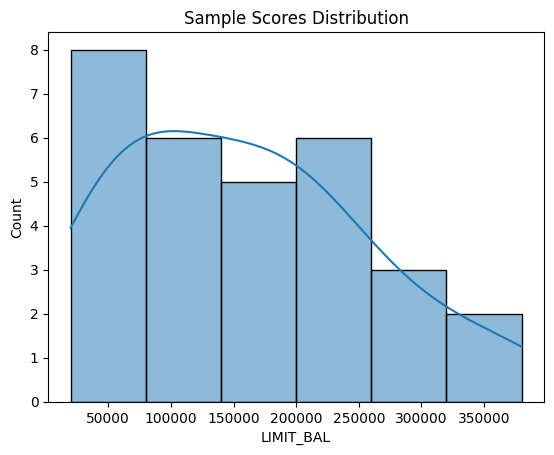

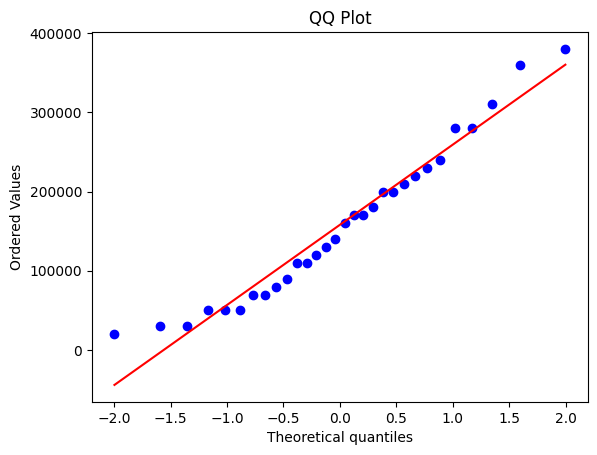

Shapiro Test : ShapiroResult(statistic=np.float64(0.9503432350954574), pvalue=np.float64(0.17267618311488392))
Approximately normal (p ≥ 0.05)


In [25]:
from scipy import stats

#  Work with the sample to analyze a specific numeric column([default payment next month])
 
# Extract just the column you're analyzing 

sample_defaults = fraud_sample_copy['LIMIT_BAL']

# Check normality

sns.histplot(sample_defaults, kde=True)
plt.title("Sample Scores Distribution")
plt.show()

# QQ plot

stats.probplot(sample_defaults, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

# Shapiro-wilk test

shapiro_result = stats.shapiro(sample_defaults)
print("Shapiro Test :", shapiro_result)

if shapiro_result.pvalue < 0.05:
    print("Not normal (p < 0.05)")

else:
    print("Approximately normal (p ≥ 0.05)")







The cell above shows **Interpretation**:

* **If p < 0.05, the data is not normally distributed**.
* **If p ≥ 0.05, the data is approximately normal**. So the data is approximately normal.

**In cell below** I calculates a 95% confidence interval for the mean of the LIMIT_BAL (credit limit) values using the **t-distribution**, which is appropriate when the population standard deviation is unknown and the sample size is relatively small.

**Steps performed**:

* **Compute Sample Statistics** – Sample size (n), sample mean, and sample standard deviation.
* **Calculate t-critical value** – Based on a 95% confidence level and degrees of freedom (n-1).
* **Determine Margin of Error** – Accounts for sampling variability.
* **Compute Confidence Interval** – The range in which the true population mean is likely to fall with 95% confidence.

In [31]:
# Compute Confidence Interval using t-distribution

# stats

n =len(sample_defaults)
mean = np.mean(sample_defaults)
std = np.std(sample_defaults, ddof=1)

# t critical

confidence = 0.95

t_crit = stats.t.ppf((1 + confidence) /2, df=n -1)

# Margin of error and interval
margin_error = t_crit * (std / np.sqrt(n))
lower, upper = mean - margin_error, mean + margin_error

print(f"95% Confidence Interval for Mean Score: ({lower:.2f}, {upper:.2f})")



95% Confidence Interval for Mean Score: (120925.58, 195074.42)


The cell above shows that **based on the sample data, we are 95% confident that the true average credit limit (LIMIT_BAL) for the population lies between 120,925.58 and 195,074.42**.

**What this means**:

* If we were to take many random samples and compute confidence intervals for each, about 95% of them would contain the true population mean.
* This interval gives a sense of the **uncertainty** around the sample mean due to sampling variability.

## **Feature Engineering**

In [27]:
# columns of the dataset
fraud_df.columns.to_list()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [28]:
fraud_df['MARRIAGE'].value_counts()

MARRIAGE
2    570
1    409
3     19
0      3
Name: count, dtype: int64